## imports

In [104]:
import tensorflow._api.v2.compat.v1 as tf
import numpy as np
tf.disable_v2_behavior()
from PIL import Image 
# print('Pillow Version:', PIL.__version__)
from numpy import asarray

import matplotlib.pyplot as plt

## initialization

In [105]:
# variables
features = 8
hidden_layer_nodes = 20
categories = 255
x = tf.placeholder(tf.float32, [None, features])

w1 = tf.Variable(tf.truncated_normal([features,hidden_layer_nodes], stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[hidden_layer_nodes]))
z1 = tf.nn.relu_layer(x,w1,b1)
# z1 = tf.nn.relu(tf.matmul(x,w1)+b1)

w2 = tf.Variable(tf.truncated_normal([hidden_layer_nodes,categories], stddev=0.1))
b2 = tf.Variable(tf.constant(0.1, shape=[categories]))
z2 = tf.matmul(z1,w2) + b2

y = tf.placeholder(tf.float32, [None, categories])

# functions
# pred = 1 / (1.0 + tf.exp(-z2))
# loss = tf.reduce_mean(-(y * tf.log(pred) + (1 - y) * tf.log( 1 - pred)))

pred = tf.nn.softmax(z2) # softMax function
# loss = tf.reduce_mean(tf.pow(pred - y, 2) + 0.1*tf.reduce_sum(tf.abs(w2))) #lasso
loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), reduction_indices=[1]))
# loss = -tf.reduce_mean(y*tf.log(pred)) # Average cross entropy loss
alfa = 0.00001
# update = tf.train.GradientDescentOptimizer(alfa).minimize(loss)

# cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), reduction_indices=[1]))
update = tf.train.GradientDescentOptimizer(alfa).minimize(loss)



## data function


In [106]:
def YtoArr(y):
    arr = []
    for i in y:
        tmp = []
        for j in range(255):# 25
            if (int(i) == j) : # i/10
                tmp.append(1)
            else :
                tmp.append(0)
        arr.append(tmp)
    return np.array(arr)

def get_XY_from_image(photo_name:str,color:int,jumps:int=100,show:bool=False):
    data = asarray(Image.open(photo_name))
    color_arr = data[:,:,color]
    image_color_arr = Image.fromarray(color_arr)
    if show: image_color_arr.show()
    data_x = []
    data_y = []
    print(f"pic size: {len(color_arr)}x{len(color_arr[0])} name: {photo_name}")
    for i in range(1,len(color_arr)-1,jumps):
        for j in range(1,len(color_arr[0])-1):
            temp_y = [color_arr[i][j]]
            temp_x = [color_arr[i-1][j-1],color_arr[i-1][j],color_arr[i][j-1],color_arr[i+1][j],color_arr[i][j+1],color_arr[i+1][j+1],color_arr[i-1][j+1],color_arr[i+1][j-1]]
            data_y.append(temp_y)
            data_x.append(temp_x)
    return (data_x,data_y)

def load_pic_data(pics_array,color:int,jumps:int=100,show:bool=False):
    data_x , data_y = get_XY_from_image(pics_array[0],color,jumps,show)
    for i in pics_array[1:]:
        data_tmp_x , data_tmp_y = get_XY_from_image(i,color,jumps,show)
        data_x = np.append(data_x,data_tmp_x,axis=0)
        data_y = np.append(data_y,data_tmp_y,axis=0)
    data_x = np.array(data_x)
    data_y = np.array(data_y)
    return data_x,data_y

## data

In [107]:
data_x , data_y = load_pic_data(
    ["data/cat_test.jpg", "data/balloon.jpg","data/cat.jpg","data/city.jpg",
    "data/city_night.jpg","data/city_color.jpg",
    "data/flower.jpg"],
    color=0,jumps=100)
data_t_x , data_t_y = load_pic_data(["data/park.jpg"],color=1,jumps=100)
# print(data_t_y)
# print(YtoArr(data_t_y))
data_y = YtoArr(data_y)
data_t_y = YtoArr(data_t_y)


pic size: 681x1024 name: data/cat_test.jpg
pic size: 480x720 name: data/balloon.jpg
pic size: 576x1024 name: data/cat.jpg
pic size: 664x1080 name: data/city.jpg
pic size: 1282x2278 name: data/city_night.jpg
pic size: 539x959 name: data/city_color.jpg
pic size: 600x800 name: data/flower.jpg
pic size: 588x830 name: data/park.jpg


## sim

In [108]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

show = 10
loss_in_time = []
w_arr = []
w2_arr = []
test_over_time = []
accuracy_over_time = []

correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

for i in range(0,1000):
       sess.run(update, feed_dict = {x:data_x, y:data_y})
       if(i%show==0 and i>21):
              tmp = sess.run(loss,feed_dict={x:data_x,y:data_y})
              loss_in_time.append(tmp)
              w_arr.append(sess.run(w1))
              w2_arr.append(sess.run(w2))
              if(i%(show*1)==0):
                     print(f"i = {i}, loss = {tmp},")
              accuracy_over_time.append(sess.run(accuracy, feed_dict={x:data_t_x,y:data_t_y}))
              test_over_time.append(sess.run(loss,feed_dict={x:data_t_x,y:data_t_y}))




i = 30, loss = 14.056649208068848,
i = 40, loss = 13.717307090759277,
i = 50, loss = 13.398831367492676,
i = 60, loss = 13.098544120788574,
i = 70, loss = 12.814695358276367,
i = 80, loss = 12.546021461486816,
i = 90, loss = 12.291389465332031,
i = 100, loss = 12.049822807312012,
i = 110, loss = 11.820378303527832,
i = 120, loss = 11.602153778076172,
i = 130, loss = 11.394316673278809,
i = 140, loss = 11.196114540100098,
i = 150, loss = 11.00678825378418,
i = 160, loss = 10.825570106506348,
i = 170, loss = 10.651749610900879,
i = 180, loss = 10.48476791381836,
i = 190, loss = 10.323995590209961,
i = 200, loss = 10.168890953063965,
i = 210, loss = 10.01906967163086,
i = 220, loss = 9.874133110046387,
i = 230, loss = 9.733675003051758,
i = 240, loss = 9.597468376159668,
i = 250, loss = 9.46528148651123,


KeyboardInterrupt: 

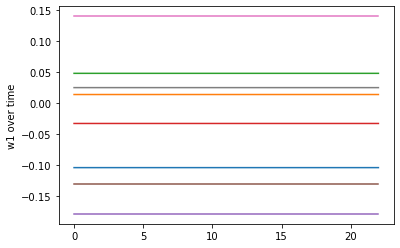

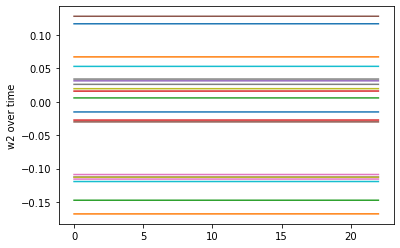

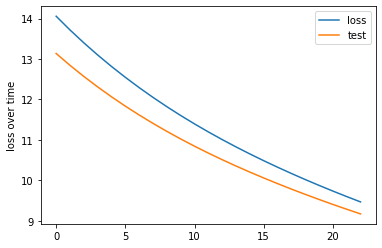

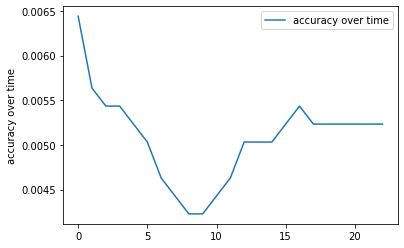

In [109]:
d = np.array(np.array(w_arr).transpose()[0]).transpose()
plt.plot(d)
plt.ylabel('w1 over time')
plt.show()

d = np.array(np.array(w2_arr).transpose()[0]).transpose()
plt.plot(d)
plt.ylabel('w2 over time')
plt.show()

plt.plot(loss_in_time,label ="loss")
plt.plot(test_over_time , label ="test")
plt.legend()
plt.ylabel('loss over time')
plt.show()

plt.plot(accuracy_over_time,label ="accuracy over time")
plt.legend()
plt.ylabel('accuracy over time')
plt.show()

In [110]:
picR,y_data = load_pic_data(["data/cat.jpg"],color=0,jumps=1)
picG,y_data = load_pic_data(["data/cat.jpg"],color=1,jumps=1)
picB,y_data = load_pic_data(["data/cat.jpg"],color=2,jumps=1)
pR = sess.run(tf.nn.softmax(z2),feed_dict={x:picR})
pG = sess.run(tf.nn.softmax(z2),feed_dict={x:picG})
pB = sess.run(tf.nn.softmax(z2),feed_dict={x:picB})
# print(p)
def YtoPic(arr):
    picture = []
    for line in arr:
        max_pos = 0
        tmp_max = 0
        for i,num in enumerate(line):
            if(num>tmp_max):
                max_pos = i
                tmp_max = num
        color_tmp = max_pos # *10
        picture.append(color_tmp)
    return picture
pictureR = YtoPic(pR)
pictureG = YtoPic(pG)
pictureB = YtoPic(pB)
size_x = 576
size_y = 1024
# data_R = np.reshape(pictureR,(size_x-2,size_y-2))
# data_G = np.reshape(pictureG,(size_x-2,size_y-2))
# data_B = np.reshape(pictureB,(size_x-2,size_y-2))

arr = np.zeros((size_x-2,size_y-2,3))
arr[:,:,0] = np.reshape(pictureR,(size_x-2,size_y-2))
arr[:,:,1] = np.reshape(pictureG,(size_x-2,size_y-2))
arr[:,:,2] = np.reshape(pictureB,(size_x-2,size_y-2))



img = Image.fromarray(arr.astype('uint8'),mode="RGB")
img.show(title="calculated")

# y_data = YtoArr(y_data)
# y_data = YtoPic(y_data)
# y_data = np.reshape(y_data,(size_x-2,size_y-2))

# data_RGB = np.concatenate((y_data,data_R), axis=1)
# img = Image.fromarray(data_RGB)
# img.show(title="calculated")




pic size: 576x1024 name: data/cat.jpg
pic size: 576x1024 name: data/cat.jpg
pic size: 576x1024 name: data/cat.jpg
